Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [1]:
import pandas as pd
import numpy as np


In [2]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [3]:
df = pd.DataFrame(data, labels)
print(df)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [4]:
df.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


**3.** Return the first 3 rows of the DataFrame `df`.

In [5]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [6]:
df[["animal","age"]]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [7]:
df_rows= df[["animal","age"]] 
df_rows.loc[["c","d","h"]]



,animal,age
c,snake,0.5
d,dog,NaN
h,cat,NaN


**6.** Select only the rows where the number of visits is greater than 3.

In [8]:
filtered_df = df[df['visits'] > 3]
filtered_df

,animal,age,visits,priority


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [9]:
dfmiss = df.loc[df["age"].isnull()]
dfmiss 

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [10]:
dfcd = df[df["animal"] == "cat"]
dfcd[dfcd["age"] < 3]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [11]:
df2_4 = df.dropna()
df2_4.loc[(df2_4["age"] >= 2) & (df2_4["age"] <= 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [12]:
df.loc[["f"],["age"]] = 1.5
df.loc["f"]

animal      cat
age         1.5
visits        3
priority     no
Name: f, dtype: object

**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [13]:
df["visits"].sum()

np.int64(19)

**12.** Calculate the mean age for each different animal in `df`.

In [14]:
g = df.groupby("animal")["age"].mean()
g # Grouped animals with their mean age

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [15]:
dataaa = {'animal': 'cat',
        'age': 3,
        'visits': 2,
        'priority':'yes'}
df_new= pd.DataFrame(dataaa, columns = ("animal","age","visits","priority"),index=["k"])
df_update = pd.concat([df, df_new], axis = 0)
df_update 

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [22]:
df = df_update.drop(index =["k"])
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**14.** Count the number of each type of animal in `df`.

In [16]:
dfanimals = df["animal"].value_counts()
dfanimals

animal
cat      4
dog      4
snake    2
Name: count, dtype: int64

**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [17]:
df_sorted = df.sort_values(by=["age","visits"],ascending= [False,True])
df_sorted

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [18]:
dff = df.replace(to_replace = 'yes', value = True) 
dff.replace(to_replace = 'no', value = False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10528\3679599022.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dff.replace(to_replace = 'no', value = False)


,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [19]:
dff.replace(to_replace = 'snake', value = 'python')

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,python,0.5,2,no
d,dog,NaN,3,True
e,dog,5.0,2,no
f,cat,1.5,3,no
g,python,4.5,1,no
h,cat,NaN,1,True
i,dog,7.0,2,no
j,dog,3.0,1,no


**18.** Load the ny-flights dataset to Python

In [27]:
file= pd.read_csv("ny-flights.csv")
file

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


**19.** Which airline ID is present maximum times in the dataset

In [28]:
maxid = file["airline_id"].value_counts()
maxid.head(1)

airline_id
20409    4902
Name: count, dtype: int64

**20.** Draw a plot between dep_delay and arr_delay

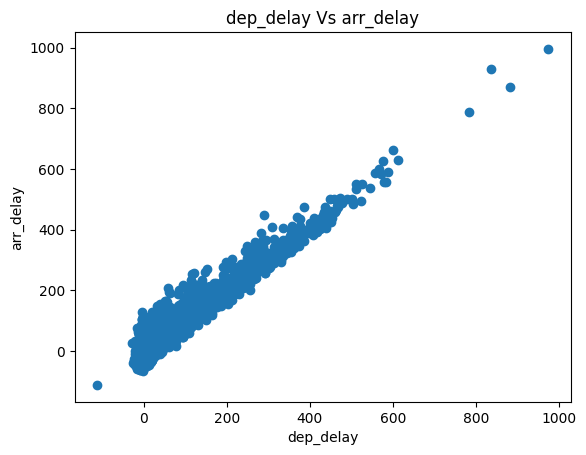

In [29]:
import matplotlib.pyplot as plt
file.dropna()
x = np.array(file["dep_delay"])
y = np.array(file["arr_delay"])
plt.scatter(x,y)
plt.xlabel("dep_delay")
plt.ylabel("arr_delay")
plt.title('dep_delay Vs arr_delay')
plt.show()

### 1 .Which airline had the most flights?

In [30]:
most_flights = df['unique_carrier'].value_counts().idxmax()
num_flights = df['unique_carrier'].value_counts().max()
print(f"Most Flights by Airline: {most_flights} ({num_flights} flights)")

Most Flights by Airline: B6 (4902 flights)


### 2. Average departure and arrival delay

In [31]:
avg_dep_delay = df["dep_delay"].mean()
avg_arr_delay = df["arr_delay"].mean()
print(f"Average Departure Delay: {avg_dep_delay:} minutes")

Average Departure Delay: 22.77212653017008 minutes


### 3. total no of flights canceled


In [32]:
canceled_flights = df["cancelled"].sum()
print(f"No of canceled flights: {canceled_flights}")

No of canceled flights: 2395.0


### 4.Top 5 most frequent flight routes

In [33]:
toproutes = df.groupby(["origin", "dest"]).size().sort_values(ascending=False).head(5)
toproutes

origin  dest
JFK     LAX     921
LGA     ATL     850
JFK     SFO     715
LGA     ORD     584
        MIA     578
dtype: int64

In [34]:
df = pd.read_csv("diabetes_model.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,77,82,41,42,35.8,0.156,35,0
1,9,122,56,0,0,33.3,1.114,33,1
2,0,113,76,0,0,33.3,0.278,23,1
3,1,139,62,41,480,40.7,0.536,21,0
4,10,161,68,23,132,25.5,0.326,47,1
...,...,...,...,...,...,...,...,...,...
609,4,114,64,0,0,28.9,0.126,24,0
610,2,175,88,0,0,22.9,0.326,22,0
611,3,121,52,0,0,36.0,0.127,25,1
612,7,136,74,26,135,26.0,0.647,51,0


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

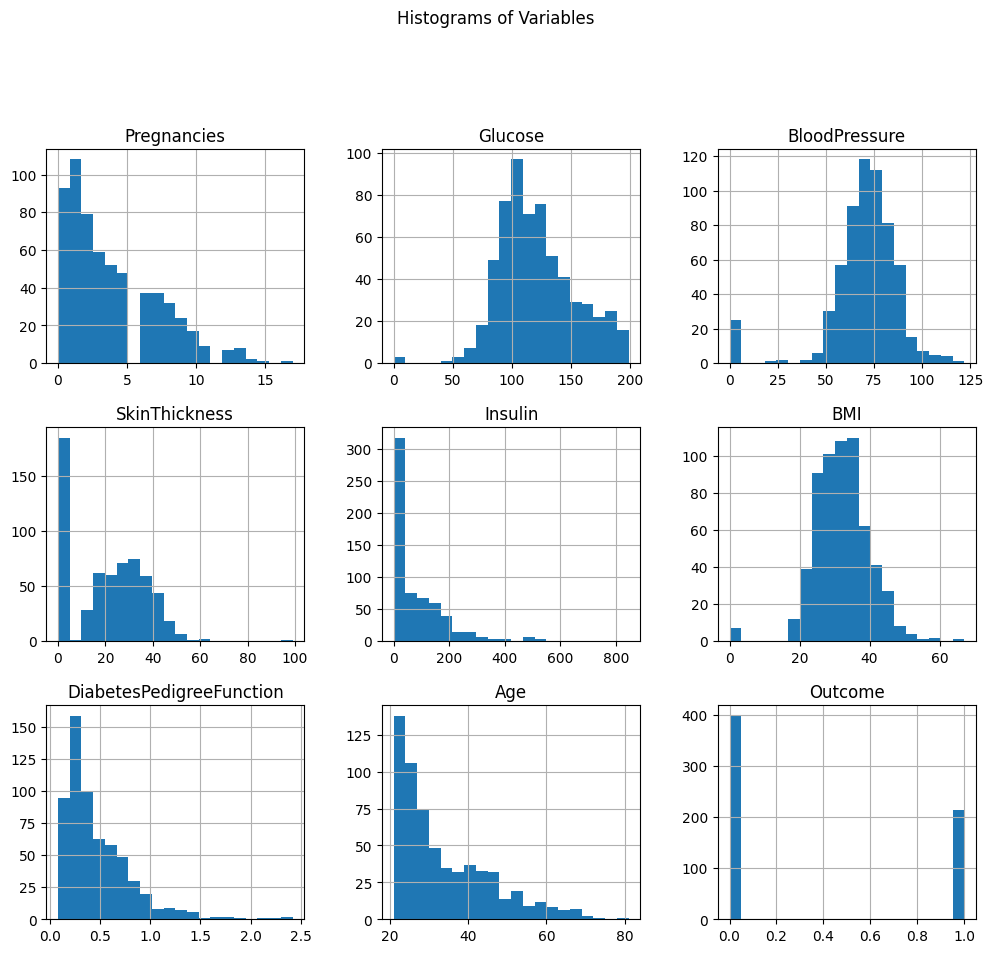

In [36]:
#Plot histograms
df.hist(figsize=(12, 10),c=" bins=20)
plt.suptitle("Histograms of Variables", y=1.02)
plt.show()

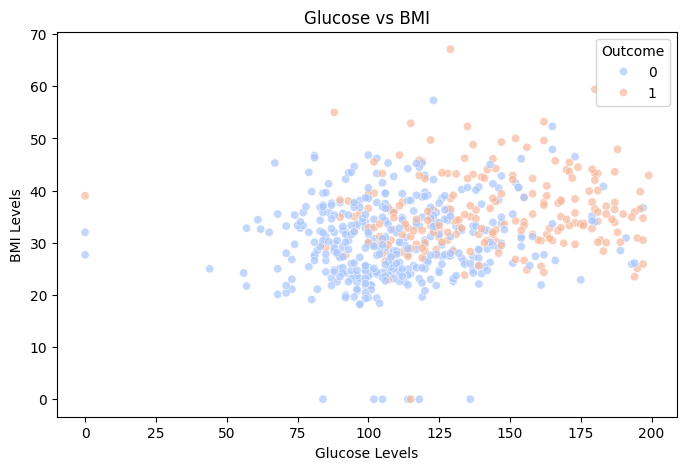

In [37]:
#histogram
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Glucose"], y=df["BMI"], hue=df["Outcome"], palette="coolwarm", alpha=.7)
plt.title("Glucose vs BMI")
plt.xlabel("Glucose Levels")
plt.ylabel("BMI Levels")
plt.show()

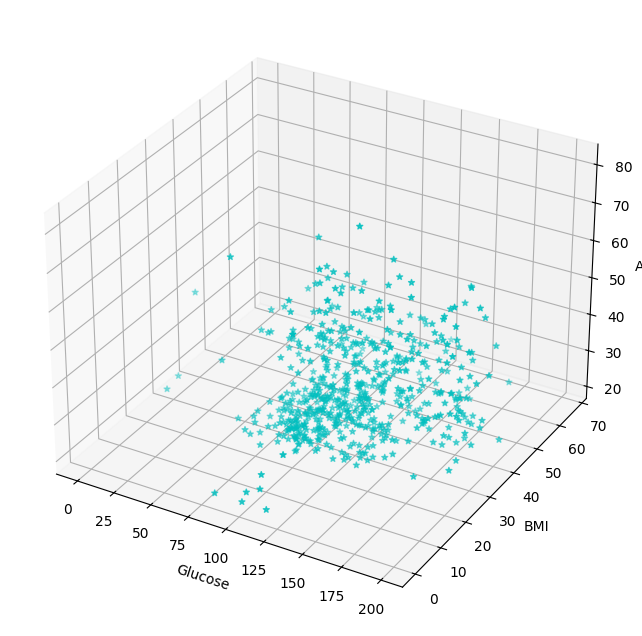

In [41]:
#3d plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Replace with relevant column names
ax.scatter(df['Glucose'], df['BMI'], df['Age'], c='c', marker='*')
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')

plt.show()